### Downside Measures

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import edhec_risk_kit as erk
import scipy.stats
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [21]:
hfi = erk.get_hfi_returns()

c:\Users\ornob\OneDrive\Workplace\Anchorblock Quant Analyst Intern\Resources\Coursera\Introduction to Portfolio Construction and Analysis with Python\W1\edhec_risk_kit.py:41: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  hfi = pd.read_csv(


#### Semideviation

In [22]:
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


In [23]:
hfi.std(ddof=0)

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

In [24]:
hfi[hfi < 0].std(ddof = 0)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [26]:
erk.semideviation(hfi)

Convertible Arbitrage     0.019800
CTA Global                0.022163
Distressed Securities     0.020214
Emerging Markets          0.037962
Equity Market Neutral     0.009568
Event Driven              0.019756
Fixed Income Arbitrage    0.015972
Global Macro              0.012588
Long/Short Equity         0.021899
Merger Arbitrage          0.011257
Relative Value            0.013649
Short Selling             0.042020
Funds Of Funds            0.016471
dtype: float64

#### VaR and CVar

Value at Risk
- Historic VaR
- Parametric VaR - Gaussian
- Modified Cornish-Fisher VaR

In [40]:
np.percentile(hfi, .5, axis=0)   # 5th percentile of each column

array([-0.080752, -0.053959, -0.069533, -0.122281, -0.026206, -0.062638,
       -0.070955, -0.029129, -0.060513, -0.027321, -0.047693, -0.120738,
       -0.061104])

In [41]:
def var_historic(r, level = 5):
    """ VaR Historic """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level = level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else:
        raise TypeError("Expected r to be Series or DataFrame")

In [44]:
var_historic(hfi, level = 5)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [46]:
erk.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [11]:
from scipy.stats import norm

In [31]:
z = norm.ppf(.05)
z

-1.6448536269514729

In [32]:
-(hfi.mean() + z * hfi.std(ddof = 0))

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [33]:
erk.var_gaussian(hfi,level=5)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [34]:
var_list = [erk.var_gaussian(hfi), erk.var_gaussian(hfi, modified = True), erk.var_historic(hfi)]

In [35]:
comparison = pd.concat(var_list, axis = 1)

In [36]:
comparison.columns = ["Gaussian", "Cornish-Fisher", "Historic"]

<Axes: title={'center': 'EDHEC Hedge Fund Indices: VaR'}>

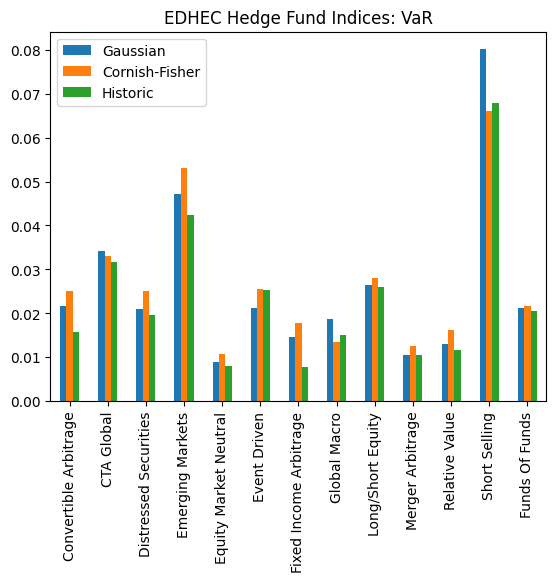

In [37]:
comparison.plot.bar(title = "EDHEC Hedge Fund Indices: VaR")

### CVaR

In [52]:
erk.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64